## Latar Belakang
---
Dalam dunia kerja yang semakin kompetitif, perusahaan perlu memastikan bahwa kinerja karyawan diimbangi dengan kompensasi yang adil. Berdasarkan proyek yang telah saya kerja sebelumnya, yaitu "Analisis Skema Penggajian Karyawan" yang tujuan utamanya adalah untuk menilai efektivitas dari berbagai skema penggajian terhadap produktivitas karyawan. Proyek tersebut memberikan wawasan mengenai seberapa besar pengaruh kompensasi terhadap kinerja dan retensi karyawan.

Namun, proyek tersebut juga menunjukkan adanya ketidakseimbangan dalam penggajian di mana beberapa karyawan bekerja lebih banyak namun mendapatkan kompensasi yang tidak sebanding, dan begitupun sebaliknya, ada pula karyawan yang memiliki potensi besar namun kurang dimanfaatkan secara optimal. Hal ini menunjukkan perlunya pendekatan yang lebih mendalam untuk memahami hubungan antara jam kerja dan efektivitas penggajian.


Dengan latar belakang ini, muncul inisiatif untuk melakukan Analisis Klasterisasi Kinerja Karyawan Berdasarkan Efektivitas Penggajian dan Jam Kerja. Proyek ini bertujuan untuk membagi karyawan menjadi beberapa klaster berdasarkan kombinasi antara skor efektivitas penggajian dan jumlah jam kerja mereka. Dengan menggunakan teknik klasterisasi, perusahaan dapat mengidentifikasi kelompok karyawan yang overworked, underutilized, atau berkinerja tinggi. Hasil analisis ini diharapkan dapat membantu pengambilan keputusan yang lebih efektif dalam hal kebijakan penggajian, distribusi beban kerja, dan strategi pengembangan karyawan.


Proyek ini juga akan memperkuat hasil dari analisis skema penggajian sebelumnya dengan memberikan perspektif baru yang lebih berfokus pada produktivitas individual dan keseimbangan kerja-kinerja.

## Dataset
---
Dataset yang digunakan dalam proyek ini adalah data karyawan selama tahun 2016-2020. Dataset ini berjumlah 177 dengan 10 atribut sebagai berikut:

1.   employee_id: identifikasi yang unik untuk setiap karyawan.
2.   branch_id: menunjukkan cabang tempat karyawan bekerja.
3.   salary: jumlah gaji yang diterima oleh karyawan.
4.   join_date: tanggal ketika karyawan mulai bekerja.
5.   resign_date: tanggal ketika karyawan berhenti bekerja (jika ada).
6.   days_of_work: lama bekerja, dalam jumlah hari (karyawan telah resign).
7.   total_work_hours: total jam kerja yang telah dilakukan oleh karyawan.
8.   effectiveness: efektivitas karyawan, yang dinyatakan sebagai kategori seperti "overwork" atau "inefisien".
9. salary_suitability: menunjukkan apakah gaji karyawan sesuai dengan standar yang telah ditentukan, dengan nilai seperti "suitable" atau "not suitable".
10. payroll_effectiveness_score: skor efektivitas penggajian karyawan, yang bisa menjadi indikator performa dalam kaitannya dengan gaji yang diterima.

Namun, tidak semua dari atribut yang tersedia akan digunakan dalam klasterisasi. Untuk analisis klasterisasi di proyek ini  hanya akan menggunakan atribut numerik atau atribut kategorikal yang telah dikonversi menjadi numerik. Berikut atribut yang akan digunakan dalam klasterisasi dan pertimbangan penggunaan atribut tersebut:
1. salary (Gaji)  
Gaji adalah atribut numerik yang menunjukkan nilai kompensasi yang diterima karyawan. Dalam konteks analisis karyawan, gaji dapat membantu mengelompokkan karyawan berdasarkan tingkat upah, yang sering kali berkorelasi dengan jenis pekerjaan, pengalaman, atau kontribusi. Gaji sering kali bervariasi antar karyawan, sehingga memberikan informasi yang berguna untuk mengidentifikasi kelompok dengan karakteristik berbeda, seperti karyawan berpenghasilan tinggi vs. rendah.
2. join_date (Tanggal Bergabung)  
Relevansi Tanggal bergabung memberikan informasi mengenai durasi kerja karyawan. Ini penting dalam memahami pengalaman karyawan di perusahaan, yang bisa berdampak pada kontribusi dan tingkat kompensasi. Dengan mengubah join_date menjadi jumlah tahun atau bulan kerja, atribut ini menjadi numerik, sehingga dapat digunakan dalam algoritma clustering yang biasanya bekerja lebih baik dengan data numerik. Karyawan yang sudah lama bekerja mungkin memiliki karakteristik yang berbeda dibandingkan karyawan baru, misalnya dalam hal efektivitas atau loyalitas.
3. resign_date (Tanggal Resign)  
Untuk karyawan yang sudah resign, resign_date dapat digunakan untuk menghitung durasi total kerja mereka di perusahaan. Durasi ini penting dalam mengelompokkan karyawan berdasarkan lama mereka berkontribusi di perusahaan. Karyawan yang belum resign (dengan nilai NaN pada resign_date) akan tetap dihitung masa kerjanya hingga tanggal tertentu (misalnya hingga tanggal analisis), sehingga tetap relevan dalam clustering.
4. days_of_work (Hari Kerja)  
Jumlah hari kerja menunjukkan seberapa sering karyawan bekerja. Ini mencerminkan kehadiran dan komitmen mereka di perusahaan, yang menjadi faktor penting dalam menilai kinerja. Variasi dalam jumlah hari kerja memungkinkan pengelompokan karyawan berdasarkan tingkat komitmen atau pola kerja mereka.
5. total_work_hours (Total Jam Kerja)  
Total jam kerja karyawan memberikan informasi tentang kontribusi mereka dalam hal waktu yang dihabiskan di pekerjaan. Ini membantu dal
am menilai produktivitas dan efektivitas karyawan. Karyawan dengan total jam kerja yang tinggi bisa menunjukkan tingkat kontribusi yang berbeda dibandingkan dengan karyawan dengan jam kerja yang lebih sedikit. Ini memberikan insight dalam mengidentifikasi pola kerja yang berbeda antar karyawan.


## Import Library

In [162]:
import pandas as pd
import numpy as np
import seaborn as sns

from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
%matplotlib inline

## Data Preparation

### Data Loading

In [163]:
df = pd.read_csv("/content/drive/MyDrive/UPGRADES SKILLZ/3. DTS FGA - Big Data Using Python/Final Project/employee.csv")
df.head()

,employe_id,branch_id,salary,join_date,resign_date,days_of_work,total_work_hours,effectiveness,salary_suitability,payroll_effectiveness_score
0,1,3,7500000,8/23/2018,NaN,NaN,889.0,inefisien,suitable,75
1,7,1,7500000,4/28/2017,NaN,NaN,19.0,inefisien,not suitable,50
2,8,1,13000000,4/28/2017,NaN,NaN,749.0,overwork,suitable,75
3,9,1,13500000,12/22/2017,10/14/2020,1027.0,2134.0,overwork,suitable,75
4,10,1,9000000,3/1/2018,NaN,NaN,2520.0,overwork,suitable,75


### Data Cleaning

#### Data Kosong

In [164]:
df.isnull().sum()

,0
employe_id,0
branch_id,0
salary,0
join_date,0
resign_date,140
days_of_work,140
total_work_hours,6
effectiveness,0
salary_suitability,0
payroll_effectiveness_score,0


In [165]:
df_missValue = pd.DataFrame({"MissingValue":df.isna().sum(), "Percent":df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')})
df_missValue

,MissingValue,Percent
employe_id,0,0.0 %
branch_id,0,0.0 %
salary,0,0.0 %
join_date,0,0.0 %
resign_date,140,79.1 %
days_of_work,140,79.1 %
total_work_hours,6,3.39 %
effectiveness,0,0.0 %
salary_suitability,0,0.0 %
payroll_effectiveness_score,0,0.0 %


Dapat kita lihat pada atribut days_of_work dan total_work_hours terdapat banyak data NaN. Hal ini terjadi karena terdapat karyawan yang belum resign, sehingga tidak terisi data resign_date dan juga tidak terhitung days_of_work dari karyawan tersebut. Oleh karena itu, agar kita dapat melihat days_of_work dari karyawan yang belum resign maka perlu dilakukan perhitungan dengan metode sebagai berikut:

Karyawan yang belum resign (di mana atribut resign_date kosong atau NaN), nilai days_of_work dihitung sebagai selisih antara tanggal 30/12/2020 dan join_date. Dipilihnya tanggal 30/12/2020 berdasarkan hari terakhir dilakukan pencatatan absen pada karyawan. Tanggal ini akan digunakan sebagai titik akhir untuk menghitung durasi kerja mereka secara konsisten.

Dengan cara ini, masa kerja semua karyawan dihitung secara konsisten hingga batas waktu terakhir, yaitu 31/12/2020, baik untuk karyawan yang sudah resign maupun yang masih bekerja.

##### Atribut days_of_work

In [166]:
# Konversi join_date dan resign_date menjadi format datetime
df['join_date'] = pd.to_datetime(df['join_date'], format='%m/%d/%Y')
df['resign_date'] = pd.to_datetime(df['resign_date'], format='%m/%d/%Y')

In [167]:
# Tanggal terakhir (12/18/2020)
last_date = pd.Timestamp('2020-12-30')

In [168]:
# Menghitung days_of_work
df['days_of_work'] = df.apply(lambda row: (row['resign_date'] - row['join_date']).days
                                   if pd.notnull(row['resign_date'])
                                   else (last_date - row['join_date']).days, axis=1)

# Menampilkan dataset dengan days_of_work yang baru
df

,employe_id,branch_id,salary,join_date,resign_date,days_of_work,total_work_hours,effectiveness,salary_suitability,payroll_effectiveness_score
0,1,3,7500000,2018-08-23,NaT,860,889.0,inefisien,suitable,75
1,7,1,7500000,2017-04-28,NaT,1342,19.0,inefisien,not suitable,50
2,8,1,13000000,2017-04-28,NaT,1342,749.0,overwork,suitable,75
3,9,1,13500000,2017-12-22,2020-10-14,1027,2134.0,overwork,suitable,75
4,10,1,9000000,2018-03-01,NaT,1035,2520.0,overwork,suitable,75
...,...,...,...,...,...,...,...,...,...,...
172,311335,1,13500000,2020-11-16,NaT,44,225.0,overwork,suitable,75
173,325787,1,12500000,2020-12-03,NaT,27,111.0,inefisien,not suitable,50
174,329501,1,13000000,2020-12-07,NaT,23,80.0,inefisien,not suitable,50
175,331374,2629,6000000,2020-12-07,NaT,23,78.0,inefisien,not suitable,50


In [169]:
df_missValue = pd.DataFrame({"MissingValue":df.isna().sum(), "Percent":df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')})
df_missValue

,MissingValue,Percent
employe_id,0,0.0 %
branch_id,0,0.0 %
salary,0,0.0 %
join_date,0,0.0 %
resign_date,140,79.1 %
days_of_work,0,0.0 %
total_work_hours,6,3.39 %
effectiveness,0,0.0 %
salary_suitability,0,0.0 %
payroll_effectiveness_score,0,0.0 %


##### Atribut total_work_hours

In [170]:
missVal_twh = df[df['total_work_hours'].isna()]
missVal_twh

,employe_id,branch_id,salary,join_date,resign_date,days_of_work,total_work_hours,effectiveness,salary_suitability,payroll_effectiveness_score
61,67,2,6500000,2019-07-01,2019-09-20,81,NaN,inefisien,suitable,25
66,72,2626,9500000,2018-06-20,2019-10-05,472,NaN,inefisien,suitable,25
73,79,2630,5500000,2018-12-21,2019-09-21,274,NaN,inefisien,suitable,25
110,10194,2,9500000,2018-11-01,NaT,790,NaN,inefisien,suitable,25
111,10195,3,13500000,2019-08-22,2019-09-10,19,NaN,inefisien,suitable,25
112,10196,3,6000000,2019-08-22,2019-10-20,59,NaN,inefisien,suitable,25


Pada atribut total_work_hours akan dilakukan penanganan khusus berdasarkan konteks. Di mana diketahui bahwa total_work_hours dihitung berdasarkan formula atau logika khusus yaitu total hari kerja dikalikan dengan rata-rata jam kerja per hari (8 jam).

In [171]:
df['total_work_hours'].fillna(df['days_of_work'] * 8, inplace=True)
df

,employe_id,branch_id,salary,join_date,resign_date,days_of_work,total_work_hours,effectiveness,salary_suitability,payroll_effectiveness_score
0,1,3,7500000,2018-08-23,NaT,860,889.0,inefisien,suitable,75
1,7,1,7500000,2017-04-28,NaT,1342,19.0,inefisien,not suitable,50
2,8,1,13000000,2017-04-28,NaT,1342,749.0,overwork,suitable,75
3,9,1,13500000,2017-12-22,2020-10-14,1027,2134.0,overwork,suitable,75
4,10,1,9000000,2018-03-01,NaT,1035,2520.0,overwork,suitable,75
...,...,...,...,...,...,...,...,...,...,...
172,311335,1,13500000,2020-11-16,NaT,44,225.0,overwork,suitable,75
173,325787,1,12500000,2020-12-03,NaT,27,111.0,inefisien,not suitable,50
174,329501,1,13000000,2020-12-07,NaT,23,80.0,inefisien,not suitable,50
175,331374,2629,6000000,2020-12-07,NaT,23,78.0,inefisien,not suitable,50


In [172]:
df_missValue = pd.DataFrame({"MissingValue":df.isna().sum(), "Percent":df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')})
df_missValue

,MissingValue,Percent
employe_id,0,0.0 %
branch_id,0,0.0 %
salary,0,0.0 %
join_date,0,0.0 %
resign_date,140,79.1 %
days_of_work,0,0.0 %
total_work_hours,0,0.0 %
effectiveness,0,0.0 %
salary_suitability,0,0.0 %
payroll_effectiveness_score,0,0.0 %


Dapat dilihat pula bahwa atribut resign_date masih memiliki banyak data kosong, hal ini disebabkan karena tidak seluruh karyawan melakukan resign. Sehingga data kosong pada atribut resign_date dapat tetap dianggap relevan dalam clustering.

#### Data Duplikat

In [173]:
df.duplicated().sum()

0

Diketahui tidak ada data duplikat pada dataset ini.

#### Memilih Fitur yang Relevan

In [174]:
df_cluster = df[['salary', 'join_date', 'resign_date', 'days_of_work', 'total_work_hours']]
df_cluster

,salary,join_date,resign_date,days_of_work,total_work_hours
0,7500000,2018-08-23,NaT,860,889.0
1,7500000,2017-04-28,NaT,1342,19.0
2,13000000,2017-04-28,NaT,1342,749.0
3,13500000,2017-12-22,2020-10-14,1027,2134.0
4,9000000,2018-03-01,NaT,1035,2520.0
...,...,...,...,...,...
172,13500000,2020-11-16,NaT,44,225.0
173,12500000,2020-12-03,NaT,27,111.0
174,13000000,2020-12-07,NaT,23,80.0
175,6000000,2020-12-07,NaT,23,78.0


### Data Eksplorasi

#### Analisa Deksriptif

In [175]:
df_cluster.describe()

,salary,join_date,resign_date,days_of_work,total_work_hours
count,1.770000e+02,177,37,177.000000,177.000000
mean,9.844633e+06,2019-05-29 22:38:38.644067840,2020-03-30 11:40:32.432432384,522.672316,1970.553672
min,5.000000e+06,2016-08-22 00:00:00,2019-09-10 00:00:00,12.000000,8.000000
25%,7.500000e+06,2018-11-12 00:00:00,2019-11-01 00:00:00,287.000000,992.000000
50%,1.000000e+07,2019-08-05 00:00:00,2020-02-20 00:00:00,485.000000,2360.000000
75%,1.250000e+07,2019-11-28 00:00:00,2020-09-04 00:00:00,695.000000,2566.000000
max,1.450000e+07,2020-12-18 00:00:00,2020-12-07 00:00:00,1591.000000,6320.000000
std,2.830914e+06,NaN,NaN,325.232792,1104.848128


In [176]:
df_cluster

,salary,join_date,resign_date,days_of_work,total_work_hours
0,7500000,2018-08-23,NaT,860,889.0
1,7500000,2017-04-28,NaT,1342,19.0
2,13000000,2017-04-28,NaT,1342,749.0
3,13500000,2017-12-22,2020-10-14,1027,2134.0
4,9000000,2018-03-01,NaT,1035,2520.0
...,...,...,...,...,...
172,13500000,2020-11-16,NaT,44,225.0
173,12500000,2020-12-03,NaT,27,111.0
174,13000000,2020-12-07,NaT,23,80.0
175,6000000,2020-12-07,NaT,23,78.0


#### Distribusi Data

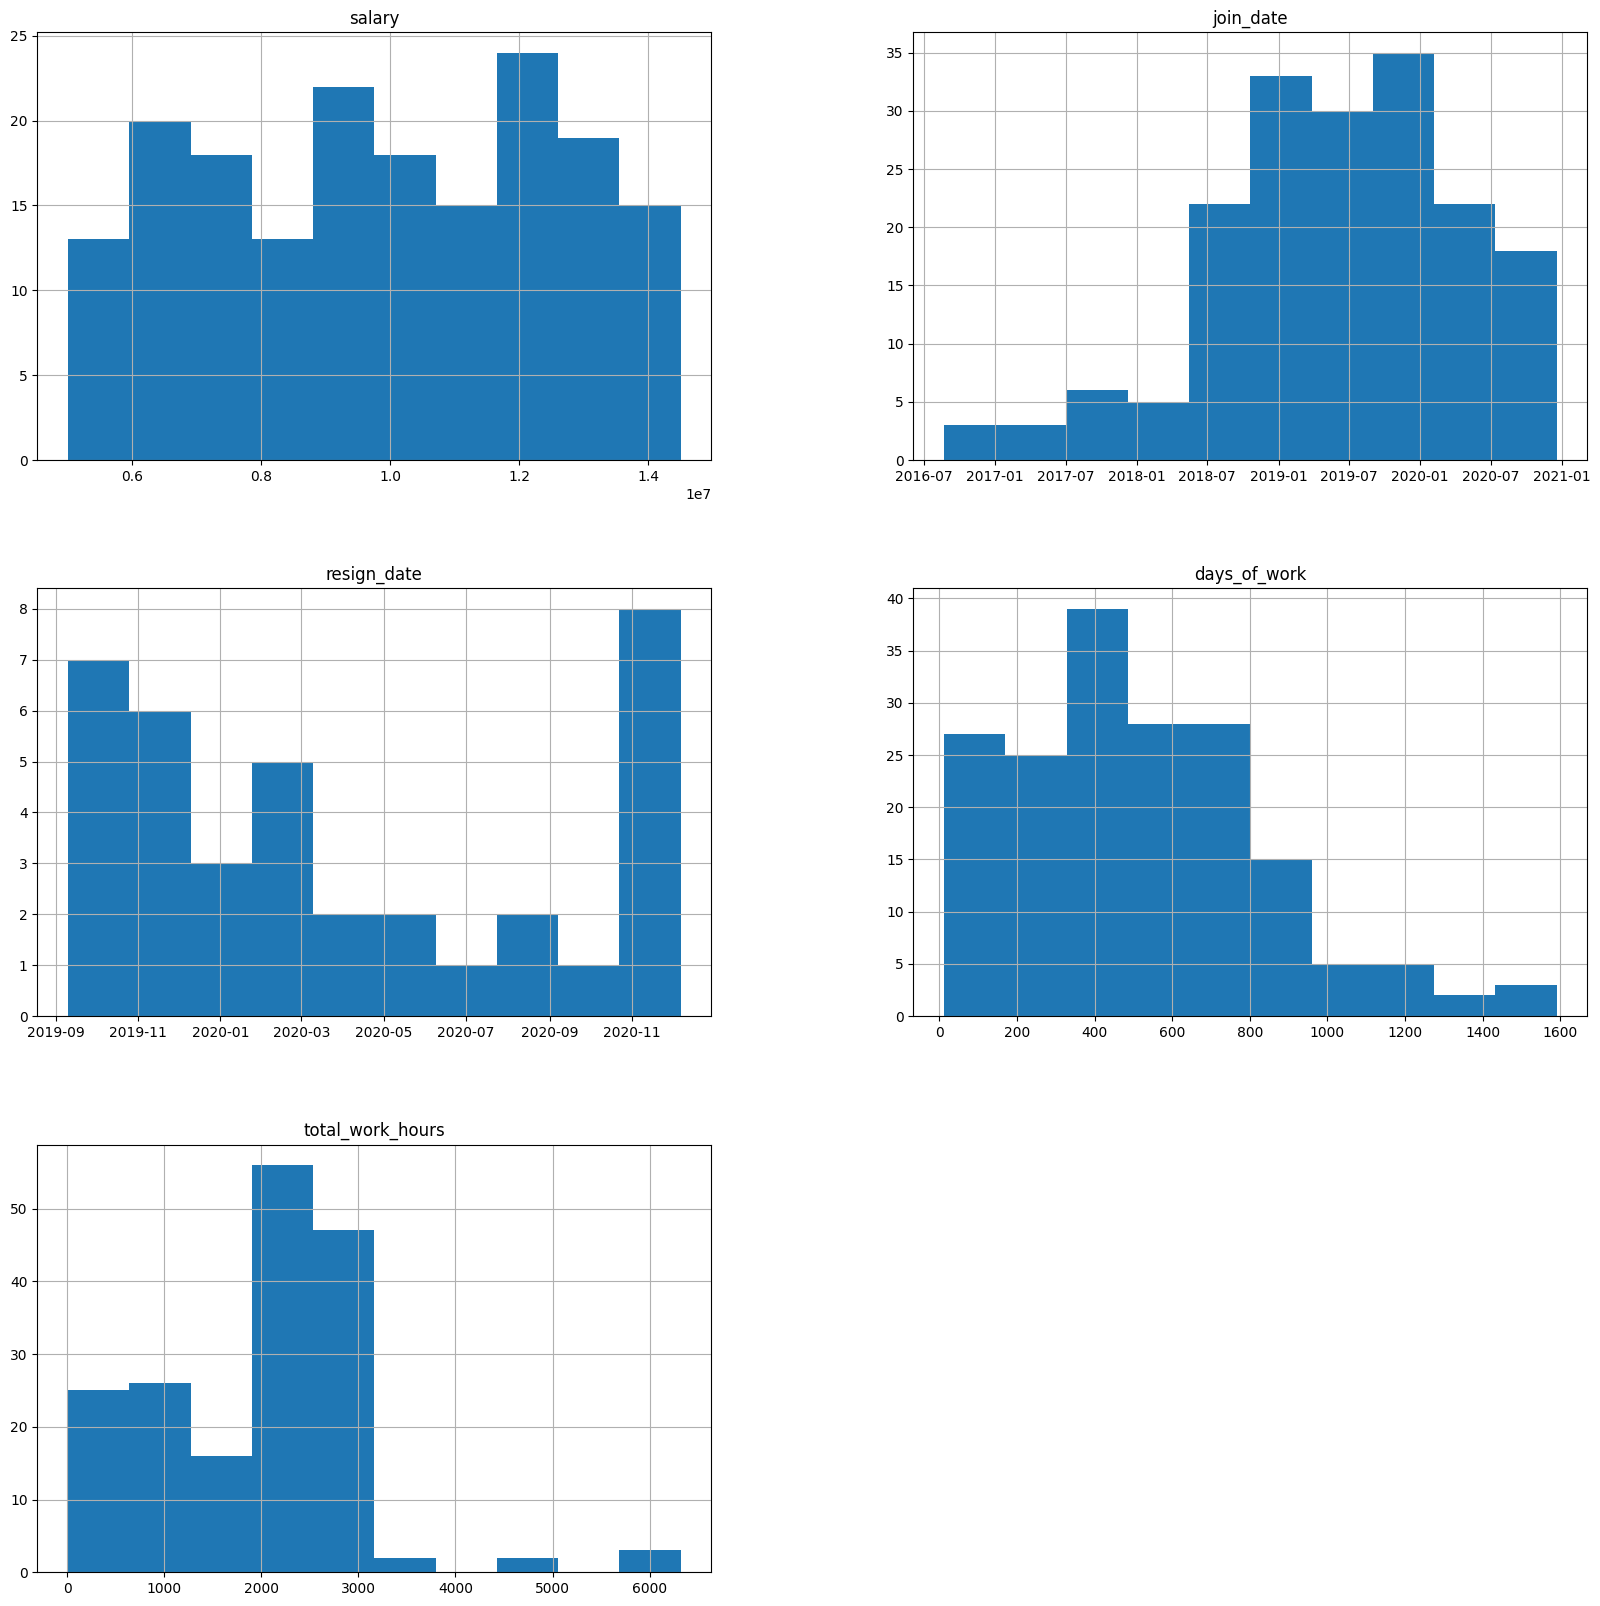

In [177]:
df_cluster.hist(figsize=(20,20))
plt.show()

Berdasarkan histogram diatas, dapat kita ketahui:
1. Pada tahun 2020 bulan 1 banyak karyawan yang masuk ke perusahaan
2. Pada tahun 2020 bulan 11 banyak karyawan yang melakukan resign
3. Terdapat lebih dari 35 karyawan yang telah bekerja lebih dari 400 hari
4. Terdapat lebih dari 50 karyawan yang telah bekerja lebih dari 2000 jam


#### Outlier

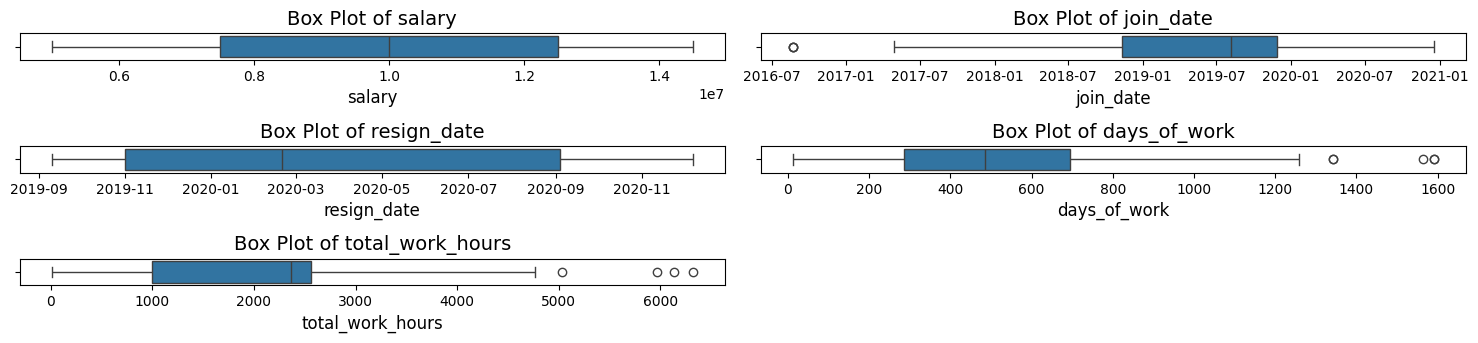

In [178]:
n_cols = 2
n_rows = int(np.ceil(len(df_cluster) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 100))
axes = axes.flatten()

for i, column in enumerate(df_cluster):
    sns.boxplot(x=df_cluster[column], ax=axes[i])
    axes[i].set_title(f"Box Plot of {column}", fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Dapat kita lihat pada beberapa atribut terdapat data yang outliers, namun pada analisis kali ini outliers tidak akan dihapus karena beberapa pertimbangan sebagai berikut:
1. salary: outliers ini mewakili karyawan dengan gaji rendah sehingga menjadi kasus yang relevan untuk dianalisis
2. join_date: ini berisi informasi tentang karyawan lama sehingga relevan untuk dianalisis
3. days_of_work: ini mewakili kasus seperti karyawan sudah bekerja lama sehingga data tersebut dapat berguna untuk analisis
4. total_work_hours: ini menunjukkan realitas pekerjaan di mana karyawan yang telah bergabung lebih dulu pasti akan memiliki total jam kerja yang lebih banyak dibandingkan karyawan baru, sehingga data ini dapat berguna untuk analisis

#### Korelasi

##### salary vs total_work_hours

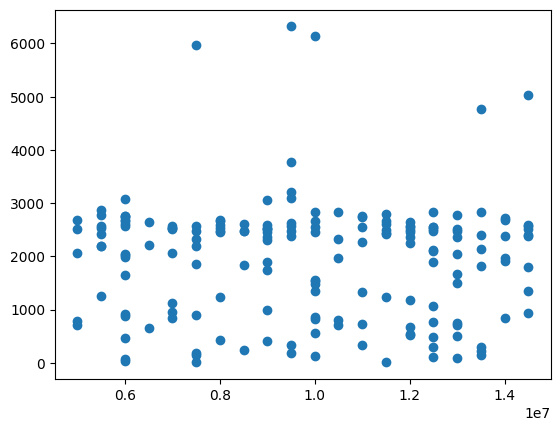

In [179]:
plt.scatter(df_cluster['salary'], df_cluster['total_work_hours'])

In [180]:
correlation = df_cluster.corr(method='pearson')
correlation['salary']['total_work_hours']

-0.024079459031215607

Dari scatter plot diatas, terlihat tidak ada korelasi yang signifikan antara gaji dengan total jam kerja. Berdasarkan perhitungan korelasi yaitu sebesar -0.02 juga menunjukan tidak ada hubungan linier yang signifikan, hal ini mengartikan bahwa besarnya gaji tidak berbanding lurus atau terbalik dengan jumlah jam kerja.

##### salary vs days_of_work

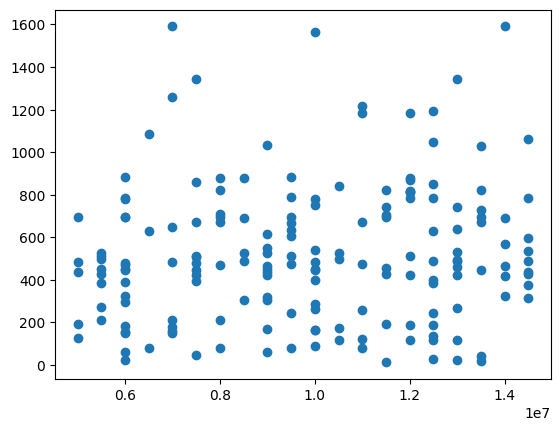

In [181]:
plt.scatter(df_cluster['salary'], df_cluster['days_of_work'])

In [182]:
correlation = df_cluster.corr(method='pearson')
correlation['salary']['days_of_work']

0.11041727465822747

Dari scatter plot diatas, terlihat tidak ada korelasi yang signifikan antara gaji dengan total hari kerja. Berdasarkan perhitungan korelasi yaitu sebesar 0.11 juga menunjukan tidak ada hubungan linier yang signifikan, hal ini mengartikan bahwa besarnya gaji tidak berbanding lurus atau terbalik dengan jumlah jam kerja.

<Axes: >

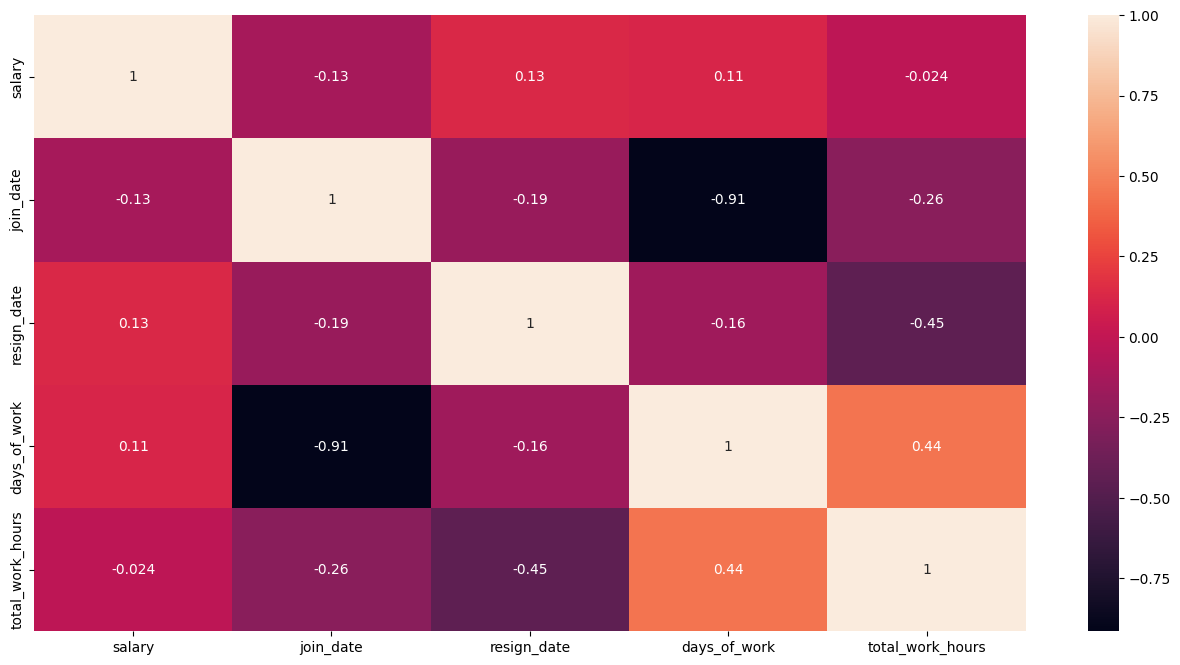

In [183]:
corr_mat = df_cluster.corr()
fig = plt.figure(figsize=(16, 8))
sns.heatmap(corr_mat, annot=True)

### Data Preprocessing

In [184]:
# Make a copy of df_cluster to preserve the original data
df_standard = df_cluster.copy()

# Convert 'join_date' and 'resign_date' to Unix timestamps in the copied DataFrame
for col in ['join_date', 'resign_date']:
    if df_standard[col].dtype == 'datetime64[ns]':
        df_standard[col] = df_standard[col].astype('int64') // 10**9  # Convert datetime to Unix timestamp (seconds)

# Standardize the data in df_copy
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_standard)

# Store the scaled data in a new DataFrame called df_standard
df_scaled = pd.DataFrame(scaled_data, columns=df_standard.columns)

# Display the standardized DataFrame
df_scaled.head()

,salary,join_date,resign_date,days_of_work,total_work_hours
0,-0.830574,-0.876252,-0.514087,1.040131,-0.981693
1,-0.830574,-2.384961,-0.514087,2.526350,-1.771366
2,1.117773,-2.384961,-0.514087,2.526350,-1.108767
3,1.294895,-1.639997,1.949076,1.555066,0.148355
4,-0.299207,-1.424020,-0.514087,1.579733,0.498716


### Model

In [185]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

n_clusters = 3 karena ingin membuat membagi karyawan kedalam 3 cluster yaitu:
1. Karyawan efisien yaitu karyawan dengan skor efektivitas penggajian tinggi dan jam kerja yang sesuai. Mereka bekerja secara efisien dan mendapatkan kompensasi yang sesuai
dengan usaha yang mereka keluarkan.
2. Karyawan overworked yaitu karyawan dalam kategori ini memiliki jam kerja yang tinggi tetapi skor efektivitas penggajian yang rendah, yang menunjukkan bahwa mereka mungkin
tidak dibayar dengan adil sesuai dengan usaha yang mereka keluarkan. Kelompok ini menunjukkan potensi ketidakseimbangan beban kerja dan kompensasi.
3. Karyawan underutilized yaitu karyawan dengan jam kerja rendah namun memiliki skor efektivitas penggajian yang baik. Ini menunjukkan potensi mereka yang belum dimanfaatkan
sepenuhnya, di mana karyawan tersebut dapat bekerja lebih banyak dan menghasilkan produktivitas yang lebih tinggi

In [186]:
y_predicted = km.fit_predict(df_scaled)
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 0, 0,
       0, 2, 0, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0,
       1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int32)

In [187]:
df_cluster['cluster'] = y_predicted
df_cluster

<ipython-input-187-812ac04b497b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['cluster'] = y_predicted


,salary,join_date,resign_date,days_of_work,total_work_hours,cluster
0,7500000,2018-08-23,NaT,860,889.0,1
1,7500000,2017-04-28,NaT,1342,19.0,1
2,13000000,2017-04-28,NaT,1342,749.0,1
3,13500000,2017-12-22,2020-10-14,1027,2134.0,1
4,9000000,2018-03-01,NaT,1035,2520.0,1
...,...,...,...,...,...,...
172,13500000,2020-11-16,NaT,44,225.0,0
173,12500000,2020-12-03,NaT,27,111.0,0
174,13000000,2020-12-07,NaT,23,80.0,0
175,6000000,2020-12-07,NaT,23,78.0,0


#### salary vs days_of_work

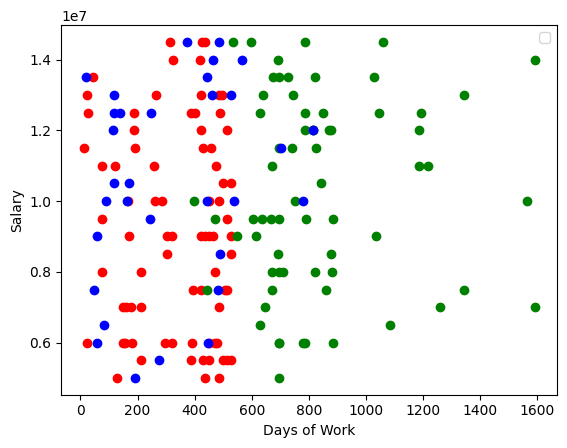

In [188]:
df1 = df_cluster[df_cluster.cluster==0]
df2 = df_cluster[df_cluster.cluster==1]
df3 = df_cluster[df_cluster.cluster==2]

plt.scatter(df1.days_of_work,df1['salary'],color='red')
plt.scatter(df2.days_of_work,df2['salary'],color='green')
plt.scatter(df3.days_of_work,df3['salary'],color='blue')

plt.xlabel('Days of Work')
plt.ylabel('Salary')
plt.legend()

#### salary vs total_work_hours

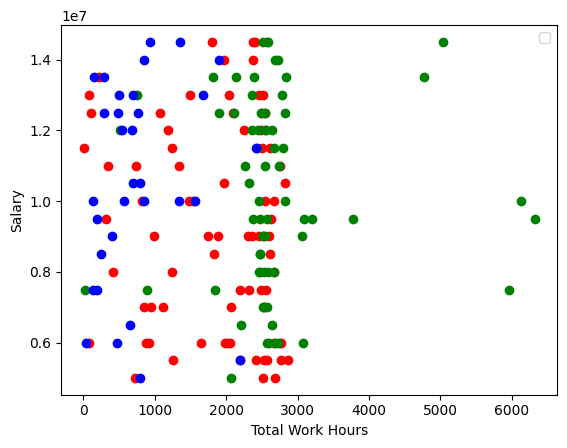

In [189]:
dfa = df_cluster[df_cluster.cluster==0]
dfb = df_cluster[df_cluster.cluster==1]
dfc = df_cluster[df_cluster.cluster==2]

plt.scatter(dfa.total_work_hours,dfa['salary'],color='red')
plt.scatter(dfb.total_work_hours,dfb['salary'],color='green')
plt.scatter(dfc.total_work_hours,dfc['salary'],color='blue')

plt.xlabel('Total Work Hours')
plt.ylabel('Salary')
plt.legend()

### Clusters

In [190]:
df_cluster

,salary,join_date,resign_date,days_of_work,total_work_hours,cluster
0,7500000,2018-08-23,NaT,860,889.0,1
1,7500000,2017-04-28,NaT,1342,19.0,1
2,13000000,2017-04-28,NaT,1342,749.0,1
3,13500000,2017-12-22,2020-10-14,1027,2134.0,1
4,9000000,2018-03-01,NaT,1035,2520.0,1
...,...,...,...,...,...,...
172,13500000,2020-11-16,NaT,44,225.0,0
173,12500000,2020-12-03,NaT,27,111.0,0
174,13000000,2020-12-07,NaT,23,80.0,0
175,6000000,2020-12-07,NaT,23,78.0,0


In [191]:
cluster_labels = km.labels_
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
cluster_counts

,count
0,78
1,67
2,32


Setelah melakukan proses clustering menggunakan KMeans dapat kita ketahui bahwa:
1. cluster 0 berisikan karyawan yang memiliki total_work_hours dan days_of_work rendah atau dibawah minimal jam kerja yaitu sebanyak 78 karyawan (underutilized)
2. cluster 1 berisikan karyawan yang memiliki total_work_hours dan days_of_work tinggi yaitu sebanyak 67 karyawan (overworked)
3. cluster 2 berisikan karyawan yang memiliki total_work_hours dan days_of_work sesuai dengan minimal jam kerja yaitu sebanyak 32 karyawan (efisien)